# License Plate Detection using YOLOv11 by Yasser Nadi

### Exploring the Dataset

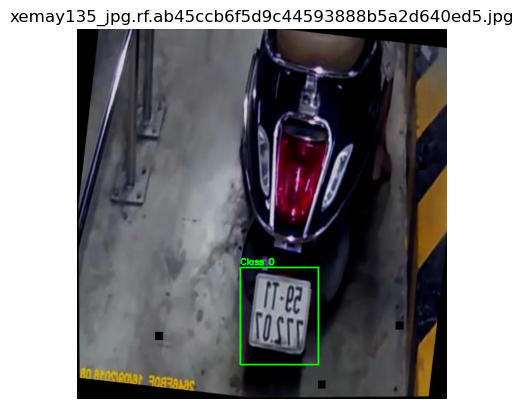

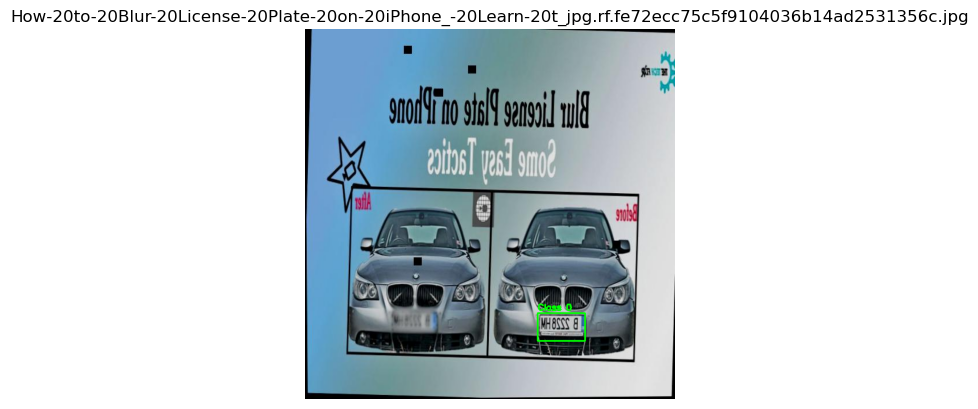

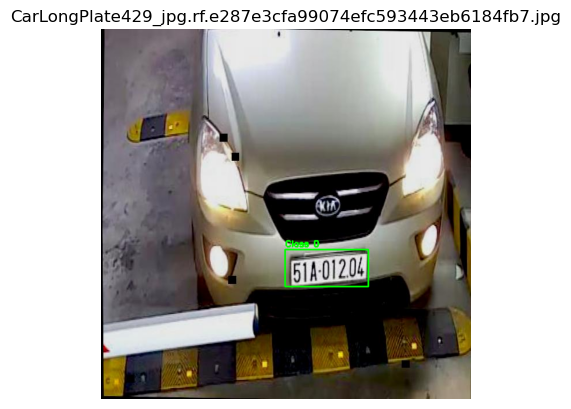

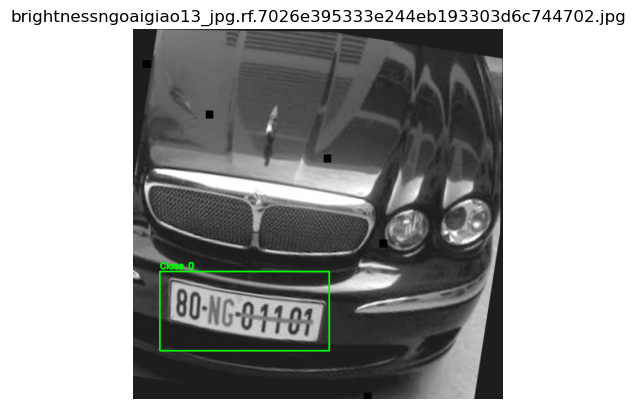

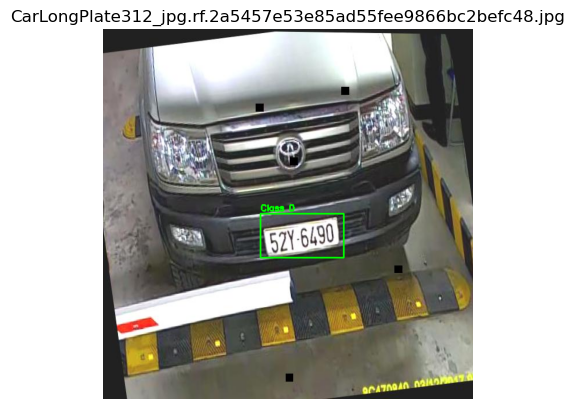

In [3]:
import os
import random
import cv2
import glob
from matplotlib import pyplot as plt

def plot_random_yolo_images(images_dir, labels_dir, num_images=5):
    image_files = []
    for ext in ['*.jpg', '*.png', '*.jpeg']:
        image_files.extend(glob.glob(os.path.join(images_dir, ext)))
    
    selected_images = random.sample(image_files, min(num_images, len(image_files)))
    
    for img_path in selected_images:
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(labels_dir, base_name + '.txt')
        
        if not os.path.exists(label_path):
            print(f"No label found for {img_path}. Skipping.")
            continue
        
        image = cv2.imread(img_path)
        if image is None:
            print(f"Failed to load {img_path}. Skipping.")
            continue
        
        img_height, img_width = image.shape[:2]
        
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            
            class_id, x_center, y_center, w, h = map(float, parts)
            x1 = int((x_center - w/2) * img_width)
            y1 = int((y_center - h/2) * img_height)
            x2 = int((x_center + w/2) * img_width)
            y2 = int((y_center + h/2) * img_height)
            
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f'Class {int(class_id)}', (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        # Display with matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(os.path.basename(img_path))
        plt.axis('off')
        plt.show()

# Usage
train_image = r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\train\images"
train_labels = r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\train\labels"
plot_random_yolo_images(train_image, train_labels)

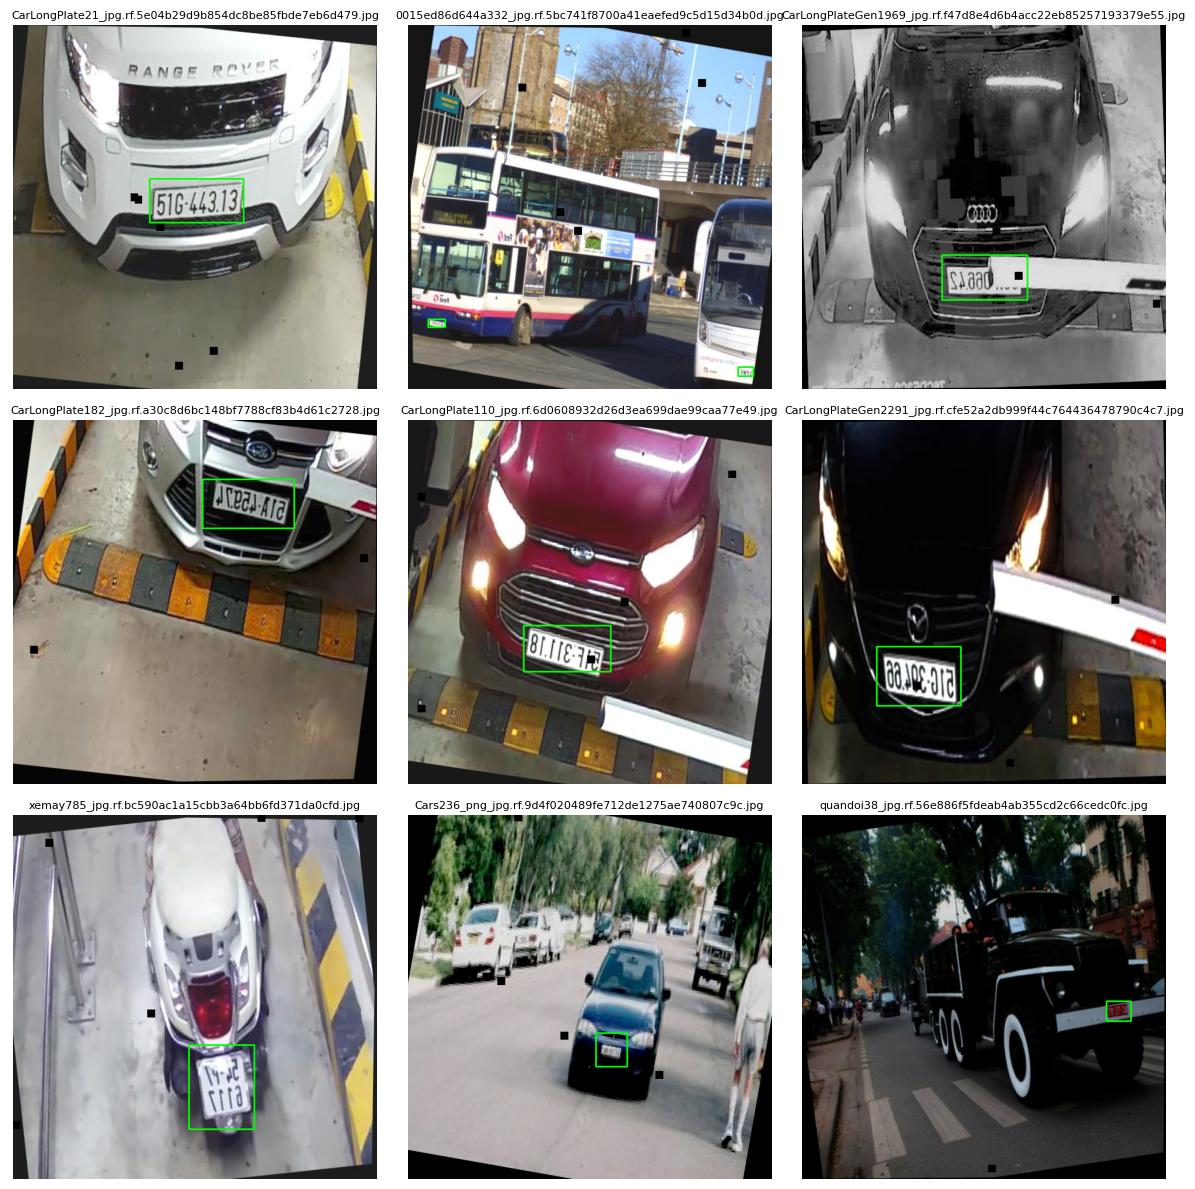

In [5]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Set paths
image_dir = r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\train\images"
label_dir = r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\train\labels"

# List image files
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
sample_files = random.sample(image_files, 9)  # 9 random images

# Function to draw YOLO bounding boxes
def draw_yolo_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    h, w = img.shape[:2]
    if not os.path.exists(label_path):
        return img  # no label = no boxes

    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            _, x_center, y_center, width, height = map(float, parts)
            x1 = int((x_center - width / 2) * w)
            y1 = int((y_center - height / 2) * h)
            x2 = int((x_center + width / 2) * w)
            y2 = int((y_center + height / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return img

# Load and annotate images
annotated_images = []
for fname in sample_files:
    img_path = os.path.join(image_dir, fname)
    label_path = os.path.join(label_dir, os.path.splitext(fname)[0] + ".txt")
    img = draw_yolo_boxes(img_path, label_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    annotated_images.append(img_rgb)

# Display in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for ax, img, title in zip(axes.flatten(), annotated_images, sample_files):
    ax.imshow(img)
    ax.set_title(title, fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.savefig("annotated_grid.jpg", dpi=300)
plt.show()


In [4]:
import os
from collections import Counter
from PIL import Image

# Set your image directory path
train_image = r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\train\images"

# Get list of image files (adjust extensions if needed)
image_files = [f for f in os.listdir(train_image) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Count image sizes
size_counter = Counter()

for img_name in image_files:
    img_path = os.path.join(train_image, img_name)
    try:
        with Image.open(img_path) as img:
            size_counter[img.size] += 1  # img.size returns (width, height)
    except Exception as e:
        print(f"Error with image {img_name}: {e}")

# Display the results
for size, count in size_counter.items():
    print(f"Size {size[0]}x{size[1]}: {count} image(s)")


Size 640x640: 21173 image(s)


### Training the model

In [5]:
import torch
print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 3060 Laptop GPU


In [1]:
from ultralytics import YOLO
import tempfile
import yaml

model = YOLO("yolo11n.pt")

data_config = {
    "train": r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\train\images",  
    "val": r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\valid\images",
    "nc": 1,  # Number of classes
    "names": ["License Plate"]  # Class names
}
with tempfile.NamedTemporaryFile(mode='w', suffix='.yaml', delete=False) as f:
    yaml.dump(data_config, f)
    temp_yaml_path = f.name

# Train on your custom dataset
results = model.train(
    data= temp_yaml_path,
    epochs=40,
    imgsz=640,
    batch=16,
    device=0 
)

# Plot training results 
results.plot()


New https://pypi.org/project/ultralytics/8.3.129 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.128  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\yasse\AppData\Local\Temp\tmpsdk57vz6.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train9, nbs=64, 

train: Scanning C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\train\labels.cache... 21173 images, 28 backgrounds


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 0.50.3 ms, read: 52.812.0 MB/s, size: 35.9 KB)


val: Scanning C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\valid\labels.cache... 2046 images, 3 backgrounds, 0 


Plotting labels to runs\detect\train9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train9
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.33G      1.224      1.647      1.245          9        640: 100%|██████████| 1324/1324 [04:43<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:18


                   all       2046       2132      0.938      0.894      0.943      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40       2.7G      1.222     0.8838      1.211         10        640: 100%|██████████| 1324/1324 [04:21<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.946      0.909      0.948      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40       2.7G      1.274     0.8317      1.261          6        640: 100%|██████████| 1324/1324 [04:13<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132       0.92      0.883      0.899      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40       2.7G      1.282      0.811      1.282          3        640: 100%|██████████| 1324/1324 [04:14<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.949      0.906      0.946      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40       2.7G      1.243     0.7412      1.268          8        640: 100%|██████████| 1324/1324 [04:13<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.958       0.92      0.958      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       2.7G      1.209     0.6988      1.246          9        640: 100%|██████████| 1324/1324 [04:13<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.962      0.931      0.961      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40       2.7G      1.196     0.6737      1.229          7        640: 100%|██████████| 1324/1324 [04:13<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132       0.96      0.931      0.964      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40       2.7G      1.172     0.6548      1.217         13        640: 100%|██████████| 1324/1324 [04:15<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.964      0.935      0.964      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40       2.7G      1.163     0.6365      1.209         10        640: 100%|██████████| 1324/1324 [04:13<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.964      0.937      0.969      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40       2.7G       1.15     0.6179      1.201          9        640: 100%|██████████| 1324/1324 [04:12<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132       0.97      0.939      0.972      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40       2.7G      1.142     0.6072      1.202         10        640: 100%|██████████| 1324/1324 [04:12<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.973       0.94      0.977      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40       2.7G      1.131     0.5979      1.187          8        640: 100%|██████████| 1324/1324 [04:12<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.971      0.947      0.977      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40       2.7G      1.115     0.5843      1.179         11        640: 100%|██████████| 1324/1324 [04:13<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.967      0.946      0.971      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40       2.7G      1.116     0.5753      1.175          8        640: 100%|██████████| 1324/1324 [04:13<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.976      0.942      0.973      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40       2.7G      1.107     0.5609       1.17          8        640: 100%|██████████| 1324/1324 [04:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.982      0.945      0.979      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40       2.7G      1.102     0.5535      1.167          8        640: 100%|██████████| 1324/1324 [04:10<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.973      0.954      0.979       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40       2.7G      1.091     0.5465      1.157         10        640: 100%|██████████| 1324/1324 [04:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16

                   all       2046       2132      0.976      0.955      0.978      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40       2.7G      1.079     0.5362      1.155         11        640: 100%|██████████| 1324/1324 [04:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.975      0.952      0.978      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40       2.7G      1.082     0.5359      1.152         13        640: 100%|██████████| 1324/1324 [04:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.977      0.949      0.979      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40       2.7G      1.069     0.5265      1.146         10        640: 100%|██████████| 1324/1324 [04:10<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.983      0.956      0.983      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40       2.7G      1.067     0.5181      1.142         11        640: 100%|██████████| 1324/1324 [04:10<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.973      0.963      0.982      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40       2.7G      1.057     0.5099       1.14          7        640: 100%|██████████| 1324/1324 [04:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.979      0.959      0.982      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40       2.7G      1.051     0.5034      1.132          9        640: 100%|██████████| 1324/1324 [04:10<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.976      0.962      0.982      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       2.7G      1.045     0.4989      1.133         10        640: 100%|██████████| 1324/1324 [04:08<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.973      0.961      0.982      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40       2.7G      1.038     0.4929       1.13          4        640: 100%|██████████| 1324/1324 [04:09<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.977       0.96      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40       2.7G      1.031     0.4876      1.126         11        640: 100%|██████████| 1324/1324 [04:09<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.974      0.966      0.982      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40       2.7G      1.023     0.4774      1.121         10        640: 100%|██████████| 1324/1324 [04:09<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.981      0.962      0.985      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40       2.7G       1.02     0.4749      1.115          6        640: 100%|██████████| 1324/1324 [04:10<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.984      0.959      0.984      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40       2.7G      1.013     0.4689      1.114          4        640: 100%|██████████| 1324/1324 [04:09<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.976      0.962      0.983      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40       2.7G      1.008     0.4645      1.112          5        640: 100%|██████████| 1324/1324 [04:09<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.981      0.961      0.983      0.709


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40       2.7G     0.9966     0.3988      1.134          5        640: 100%|██████████| 1324/1324 [04:07<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132       0.98       0.96      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40       2.7G     0.9814     0.3913      1.127          5        640: 100%|██████████| 1324/1324 [04:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.975      0.965      0.984       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40       2.7G      0.973     0.3833      1.127          5        640: 100%|██████████| 1324/1324 [04:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.978      0.969      0.986      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40       2.7G     0.9631      0.377      1.118          5        640: 100%|██████████| 1324/1324 [04:12<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.985      0.959      0.986      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       2.7G     0.9518     0.3707       1.11          5        640: 100%|██████████| 1324/1324 [04:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.986      0.958      0.986      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40       2.7G      0.944     0.3627      1.107          5        640: 100%|██████████| 1324/1324 [04:13<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.983      0.962      0.985      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40       2.7G     0.9332     0.3565      1.094          5        640: 100%|██████████| 1324/1324 [04:05<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.984      0.962      0.987      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40       2.7G     0.9272     0.3512      1.093          5        640: 100%|██████████| 1324/1324 [04:04<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.983      0.962      0.986      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40       2.7G     0.9165     0.3447      1.088          5        640: 100%|██████████| 1324/1324 [04:05<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132       0.98      0.967      0.985      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40       2.7G     0.9081     0.3385      1.083          5        640: 100%|██████████| 1324/1324 [04:05<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17

                   all       2046       2132      0.979      0.968      0.985      0.716



40 epochs completed in 3.013 hours.
Optimizer stripped from runs\detect\train9\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train9\weights\best.pt, 5.5MB

Validating runs\detect\train9\weights\best.pt...
Ultralytics 8.3.128  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:18


                   all       2046       2132      0.983      0.962      0.986      0.717
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs\detect\train9


TypeError: 'bool' object is not callable

## Testing the performance of Detection on Test Images

### Metrics de performance

In [15]:
import os
import time
import cv2
import torch
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score, f1_score

# === Paths ===
image_dir = r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\test\images"
label_dir = r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\test\labels"
model_path = r"runs/detect/train9/weights/best.pt"

# === Load model ===
model = YOLO(model_path)
model.fuse()

# === Utility: Compute IoU ===
def compute_iou(box1, box2):
    # box: [x1, y1, x2, y2]
    xi1 = max(box1[0], box2[0])
    yi1 = max(box1[1], box2[1])
    xi2 = min(box1[2], box2[2])
    yi2 = min(box1[3], box2[3])
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0.0

# === Initialize counters ===
TP = 0
FP = 0
FN = 0
num_images = 0
start_time = time.time()

image_fnames = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

for fname in image_fnames:
    image_path = os.path.join(image_dir, fname)
    label_path = os.path.join(label_dir, os.path.splitext(fname)[0] + ".txt")
    if not os.path.exists(label_path):
        continue

    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    # Load GT boxes
    gt_boxes = []
    gt_classes = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                cls = int(parts[0])
                xc, yc, bw, bh = map(float, parts[1:])
                x1 = (xc - bw / 2) * w
                y1 = (yc - bh / 2) * h
                x2 = (xc + bw / 2) * w
                y2 = (yc + bh / 2) * h
                gt_boxes.append([x1, y1, x2, y2])
                gt_classes.append(cls)

    # Predict
    results = model.predict(source=img, conf=0.25, iou=0.5, verbose=False)[0]
    preds = results.boxes
    pred_boxes = preds.xyxy.cpu().numpy() if preds is not None else []
    pred_classes = preds.cls.cpu().numpy().astype(int).tolist() if preds is not None else []

    matched_gt = set()

    for pred_box, pred_cls in zip(pred_boxes, pred_classes):
        best_iou = 0
        best_idx = -1
        for i, (gt_box, gt_cls) in enumerate(zip(gt_boxes, gt_classes)):
            if i in matched_gt or pred_cls != gt_cls:
                continue
            iou = compute_iou(pred_box, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_idx = i
        if best_iou >= 0.5:
            TP += 1
            matched_gt.add(best_idx)
        else:
            FP += 1

    FN += len(gt_boxes) - len(matched_gt)
    num_images += 1

# === Compute metrics ===
end_time = time.time()
total_time = end_time - start_time
fps = num_images / total_time if total_time > 0 else 0.0

precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

# === Print results ===
print("\n--- Evaluation Metrics on Test Set ---")
print(f"Precision (IoU ≥ 0.5):  {precision:.4f}")
print(f"Recall (IoU ≥ 0.5):     {recall:.4f}")
print(f"F1-score:               {f1:.4f}")
print(f"Latency (FPS):          {fps:.2f}")



YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

--- Evaluation Metrics on Test Set ---
Precision (IoU ≥ 0.5):  0.9695
Recall (IoU ≥ 0.5):     0.9704
F1-score:               0.9700
Latency (FPS):          34.69


✅ Saved comparison to yolo_prediction_vs_truth.png


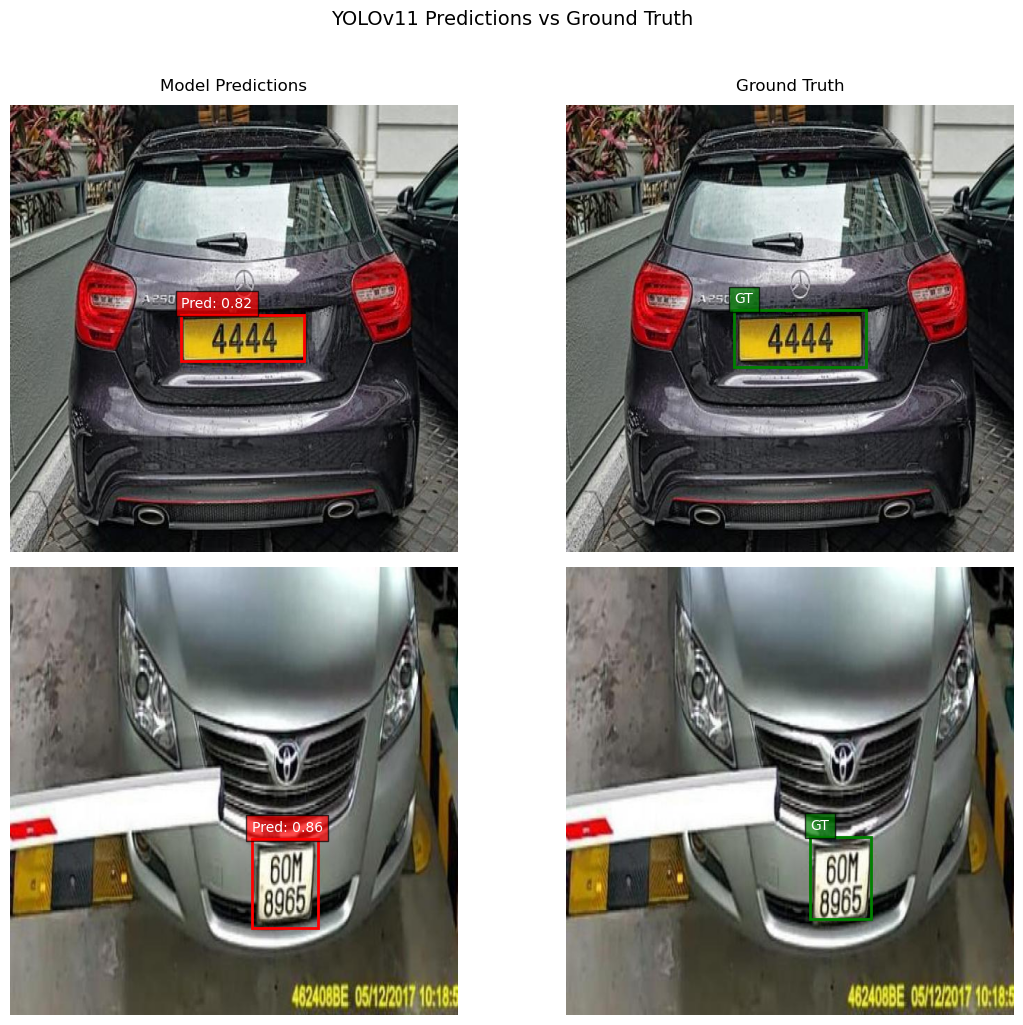

In [27]:
import os
import random
import glob
from PIL import Image
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO

# 📁 Chemins
image_folder = r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\test\images"
label_folder = r"C:\Users\yasse\OneDrive\Bureau\Project X\~\Downloads\test\labels"
model_path = "runs/detect/train9/weights/best.pt"

# 🔧 Configuration
threshold = 0.6
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = YOLO(model_path)
model.to(device)

# ➤ Conversion YOLO → pixels
def yolo_to_pixels(box, img_width, img_height):
    x_center, y_center, width, height = box
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    return [
        x_center - width / 2,
        y_center - height / 2,
        x_center + width / 2,
        y_center + height / 2
    ]

# ➤ Prédictions
def process_prediction(img_path, ax):
    img = Image.open(img_path).convert("RGB")
    img_width, img_height = img.size
    ax.imshow(img)

    results = model(img_path, conf=threshold, verbose=False)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        score = box.conf.item()
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 10, f"Pred: {score:.2f}", color='white', fontsize=10,
                bbox=dict(facecolor='red', alpha=0.7))
    ax.axis("off")

# ➤ Ground Truth
def show_ground_truth(img_path, ax):
    img = Image.open(img_path).convert("RGB")
    img_width, img_height = img.size
    ax.imshow(img)

    label_path = os.path.join(label_folder, os.path.splitext(os.path.basename(img_path))[0] + ".txt")
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = list(map(float, line.strip().split()))
                if len(parts) == 5:
                    _, x, y, w, h = parts
                    box = yolo_to_pixels([x, y, w, h], img_width, img_height)
                    xmin, ymin, xmax, ymax = box
                    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                             linewidth=2, edgecolor='green', facecolor='none')
                    ax.add_patch(rect)
                    ax.text(xmin, ymin - 10, "GT", color='white', fontsize=10,
                            bbox=dict(facecolor='green', alpha=0.7))
    ax.axis("off")

# ➤ Sélection d’images valides
valid_images = []
for img_path in glob.glob(os.path.join(image_folder, "*")):
    label_path = os.path.join(label_folder, os.path.splitext(os.path.basename(img_path))[0] + ".txt")
    if os.path.exists(label_path):
        results = model(img_path, conf=threshold, verbose=False)[0]
        if len(results.boxes) > 0:
            valid_images.append(img_path)

selected_images = random.sample(valid_images, min(2, len(valid_images)))

# ➤ Visualisation
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("YOLOv11 Predictions vs Ground Truth", fontsize=14, y=1.02)

for i, img_path in enumerate(selected_images):
    process_prediction(img_path, axes[i, 0])
    show_ground_truth(img_path, axes[i, 1])

axes[0, 0].set_title("Model Predictions", pad=10)
axes[0, 1].set_title("Ground Truth", pad=10)

plt.tight_layout()
output_path = "yolo_prediction_vs_truth.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ Saved comparison to {output_path}")
plt.show()


## Implementation d'OCR


0: 416x640 1 License Plate, 26.1ms
Speed: 5.0ms preprocess, 26.1ms inference, 9.3ms postprocess per image at shape (1, 3, 416, 640)


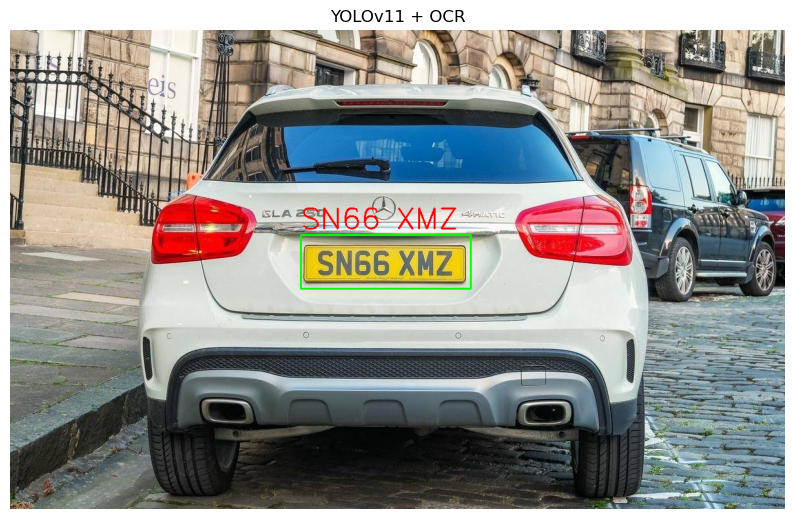

In [12]:
from ultralytics import YOLO
import cv2
import easyocr
import matplotlib.pyplot as plt

# Load model
model = YOLO("runs/detect/train9/weights/best.pt")

# Load image
image_path = 'cla.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run detection
results = model(img_rgb)

# Initialize OCR
reader = easyocr.Reader(['en'])

# Draw results and OCR
for box in results[0].boxes.data.cpu().numpy():
    x1, y1, x2, y2, conf, cls = box
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
    cropped = img_rgb[y1:y2, x1:x2]
    gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
    ocr_results = reader.readtext(gray)
    
    # Draw bounding box
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    if ocr_results:
        text = ocr_results[0][1]
        cv2.putText(img_rgb, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 2)

# Display result
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("YOLOv11 + OCR")
save_path = 'output_detection.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
import cv2
import torch
from ultralytics import YOLO
import easyocr
import os

# Initialize YOLO model and EasyOCR reader
model = YOLO("runs/detect/train9/weights/best.pt")
reader = easyocr.Reader(['en'])

# Video input/output paths
input_path = 'demo.mp4'      
output_path = 'output_annotated.mp4'

# Open input video
cap = cv2.VideoCapture(input_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Setup video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (w, h))

# Process video frame-by-frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run YOLOv8 inference
    results = model(img_rgb)

    # Extract boxes
    boxes = results[0].boxes.data.cpu().numpy()
    for box in boxes:
        x1, y1, x2, y2, conf, cls = map(int, box[:6])
        
        # Crop box and OCR
        cropped = img_rgb[y1:y2, x1:x2]
        gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
        ocr_results = reader.readtext(gray)
        text = ocr_results[0][1] if ocr_results else ""

        # Draw box and label
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        if text:
            cv2.putText(frame, text, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.2,
                        (255, 0, 0), 2)

    # Write frame to output
    out.write(frame)

# Cleanup
cap.release()
out.release()
print(f"✅ Annotated video saved to: {output_path}")



0: 416x640 1 License Plate, 25.3ms
Speed: 5.4ms preprocess, 25.3ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 640)


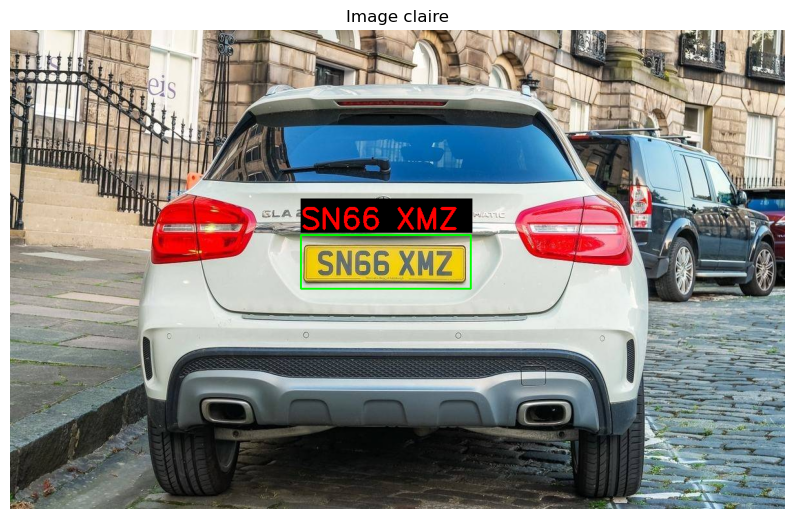

In [19]:
from ultralytics import YOLO
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

# Load model
model = YOLO("runs/detect/train9/weights/best.pt")

# Load image
image_path = 'cla.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run detection
results = model(img_rgb)

# Initialize OCR
reader = easyocr.Reader(['en'])

# Counter for dynamic background
background_index = 0
dynamic_colors = [(0, 0, 0), (64, 64, 64)]  # Black and dark gray for alternation

# Draw results and OCR with dynamic background and padding
for box in results[0].boxes.data.cpu().numpy():
    x1, y1, x2, y2, conf, cls = box
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
    cropped = img_rgb[y1:y2, x1:x2]
    gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
    ocr_results = reader.readtext(gray)
    
    # Draw bounding box
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    if ocr_results:
        text = ocr_results[0][1]
        # Get text size for background
        (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1.5, 2)
        # Dynamic background color (alternate between colors)
        background_color = dynamic_colors[background_index % len(dynamic_colors)]
        background_index += 1
        # Add padding (e.g., 10 pixels on width, 5 pixels on height, adjustable)
        padding_x = 10
        padding_y = 10
        background_x = x1
        background_y = y1 - text_height - baseline - padding_y
        background_width = text_width + 2 * padding_x  # Padding on both sides
        background_height = text_height + 2 * padding_y  # Padding on both sides
        # Ensure background stays within image bounds
        background_x = max(0, background_x)
        background_y = max(0, background_y)
        background_width = min(img_rgb.shape[1] - background_x, background_width)
        background_height = min(img_rgb.shape[0] - background_y, background_height)
        # Draw dynamic background rectangle
        cv2.rectangle(img_rgb, (background_x, background_y), 
                     (background_x + background_width, background_y + background_height), 
                     background_color, -1)
        # Add text on top of the background
        cv2.putText(img_rgb, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)

# Display result
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Image claire")
save_path = 'Image claire.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


0: 320x640 1 License Plate, 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 2.5ms postprocess per image at shape (1, 3, 320, 640)


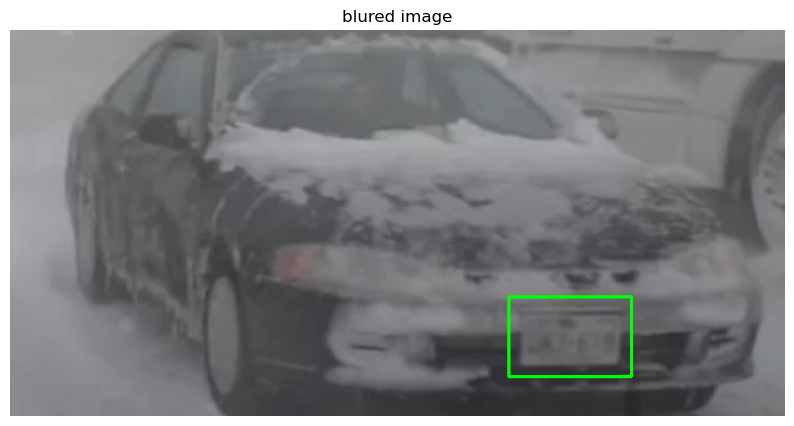

In [22]:
from ultralytics import YOLO
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

# Load model
model = YOLO("runs/detect/train9/weights/best.pt")

# Load image
image_path = 'blured image.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run detection
results = model(img_rgb)

# Initialize OCR
reader = easyocr.Reader(['en'])

# Counter for dynamic background
background_index = 0
dynamic_colors = [(0, 0, 0), (64, 64, 64)]  # Black and dark gray for alternation

# Draw results and OCR with dynamic background and padding
for box in results[0].boxes.data.cpu().numpy():
    x1, y1, x2, y2, conf, cls = box
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
    cropped = img_rgb[y1:y2, x1:x2]
    gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
    ocr_results = reader.readtext(gray)
    
    # Draw bounding box
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    if ocr_results:
        text = ocr_results[0][1]
        # Get text size for background
        (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1.5, 2)
        # Dynamic background color (alternate between colors)
        background_color = dynamic_colors[background_index % len(dynamic_colors)]
        background_index += 1
        # Add padding (e.g., 10 pixels on width, 5 pixels on height, adjustable)
        padding_x = 10
        padding_y = 10
        background_x = x1
        background_y = y1 - text_height - baseline - padding_y
        background_width = text_width + 2 * padding_x  # Padding on both sides
        background_height = text_height + 2 * padding_y  # Padding on both sides
        # Ensure background stays within image bounds
        background_x = max(0, background_x)
        background_y = max(0, background_y)
        background_width = min(img_rgb.shape[1] - background_x, background_width)
        background_height = min(img_rgb.shape[0] - background_y, background_height)
        # Draw dynamic background rectangle
        cv2.rectangle(img_rgb, (background_x, background_y), 
                     (background_x + background_width, background_y + background_height), 
                     background_color, -1)
        # Add text on top of the background
        cv2.putText(img_rgb, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)

# Display result
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("blured image")
save_path = 'blured image.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


0: 480x640 1 License Plate, 38.9ms
Speed: 5.1ms preprocess, 38.9ms inference, 4.7ms postprocess per image at shape (1, 3, 480, 640)


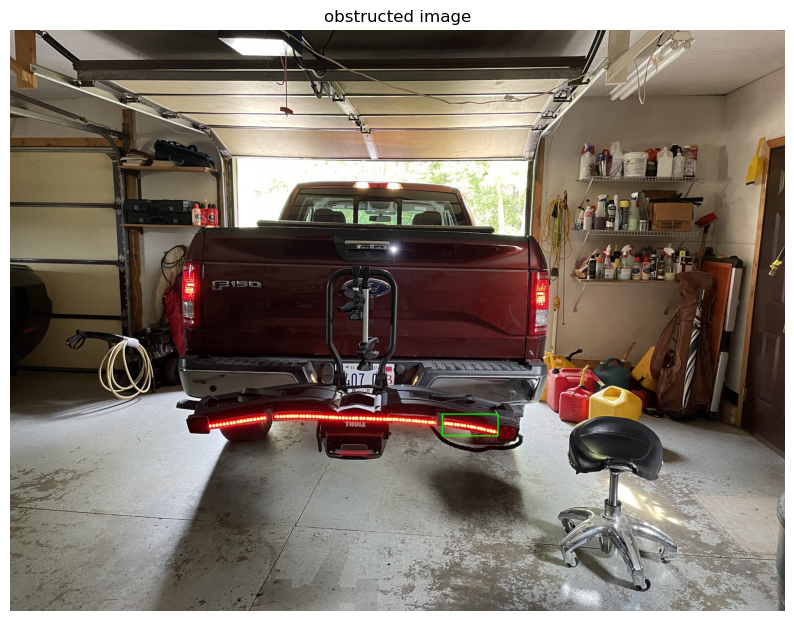

In [28]:
from ultralytics import YOLO
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

# Load model
model = YOLO("runs/detect/train9/weights/best.pt")

# Load image
image_path = 'obscured license.jpeg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run detection
results = model(img_rgb)

# Initialize OCR
reader = easyocr.Reader(['en'])

# Counter for dynamic background
background_index = 0
dynamic_colors = [(0, 0, 0), (64, 64, 64)]  # Black and dark gray for alternation

# Draw results and OCR with dynamic background and padding
for box in results[0].boxes.data.cpu().numpy():
    x1, y1, x2, y2, conf, cls = box
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
    cropped = img_rgb[y1:y2, x1:x2]
    gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
    ocr_results = reader.readtext(gray)
    
    # Draw bounding box
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    if ocr_results:
        text = ocr_results[0][1]
        # Get text size for background
        (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1.5, 2)
        # Dynamic background color (alternate between colors)
        background_color = dynamic_colors[background_index % len(dynamic_colors)]
        background_index += 1
        # Add padding (e.g., 10 pixels on width, 5 pixels on height, adjustable)
        padding_x = 10
        padding_y = 10
        background_x = x1
        background_y = y1 - text_height - baseline - padding_y
        background_width = text_width + 2 * padding_x  # Padding on both sides
        background_height = text_height + 2 * padding_y  # Padding on both sides
        # Ensure background stays within image bounds
        background_x = max(0, background_x)
        background_y = max(0, background_y)
        background_width = min(img_rgb.shape[1] - background_x, background_width)
        background_height = min(img_rgb.shape[0] - background_y, background_height)
        # Draw dynamic background rectangle
        cv2.rectangle(img_rgb, (background_x, background_y), 
                     (background_x + background_width, background_y + background_height), 
                     background_color, -1)
        # Add text on top of the background
        cv2.putText(img_rgb, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)

# Display result
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("obstructed image")
save_path = 'obstructed image.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()